Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [219]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math

n = 60
a = 0
sigma = 3
q = 1.75

Task 1


In [220]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[ 4.71761073 -0.83104679 -5.54857525 -0.60645084 -2.22596819  0.17439125
 -3.37299603  1.08778798 -0.25473258  1.73292923 -0.79875956  2.04571105
 -1.42865302 -0.71351602  0.23912312  2.15108865  5.81143323  0.97486667
  0.32089118 -5.90963291 -2.09309957  5.29990584  4.2180933   0.30277938
  0.85516942 -4.48607037 -0.32671242  2.38091998 -0.03713229  4.07741789
  4.52404681  0.26328255  6.37298008  1.5957226   0.90161861 -0.06505472
  2.85781655  0.23124801  0.2150367  -1.34140606 -0.4240465   0.57917144
 -1.78575049  3.20087827  1.17444834 -1.8268914  -3.67955266 -1.48790604
 -3.91704049 -4.91220817  2.68700373 -2.38365775  2.02069522 -0.89330298
  8.40130689 -7.06847511 -4.80532366 -1.15565023 -3.55533173 -1.56502073]


In [221]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(n_intervals, min_smpl, max_smpl, h)


7 -8 9 2.4285714285714284


In [222]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)


1 interval: -8.0 - -5.571428571428571
2 interval: -5.571428571428571 - -3.1428571428571432
3 interval: -3.1428571428571432 - -0.7142857142857153
4 interval: -0.7142857142857153 - 1.7142857142857135
5 interval: 1.7142857142857135 - 4.142857142857142
6 interval: 4.142857142857142 - 6.571428571428569
7 interval: 6.571428571428569 - 9.0


In [223]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма относительных частот - {(frequency/n).sum()}')



1 interval: 2
2 interval: 8
3 interval: 13
4 interval: 21
5 interval: 9
6 interval: 6
7 interval: 1

Сумма относительных частот - 1.0


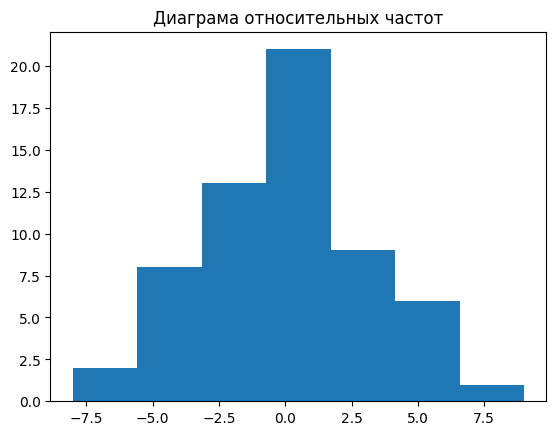

In [224]:
plt.title("Диаграма относительных частот")
plt.stairs(frequency, intervals, fill=True)

In [225]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.013725490196078433
2 interval: 0.05490196078431373
3 interval: 0.08921568627450982
4 interval: 0.14411764705882354
5 interval: 0.06176470588235295
6 interval: 0.0411764705882353
7 interval: 0.0068627450980392165


[0.01372549 0.05490196 0.08921569 0.14411765 0.06176471 0.04117647
 0.00686275]
0.411764705882353


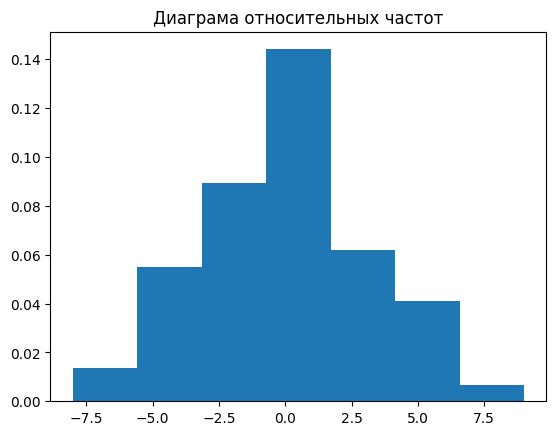

In [226]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

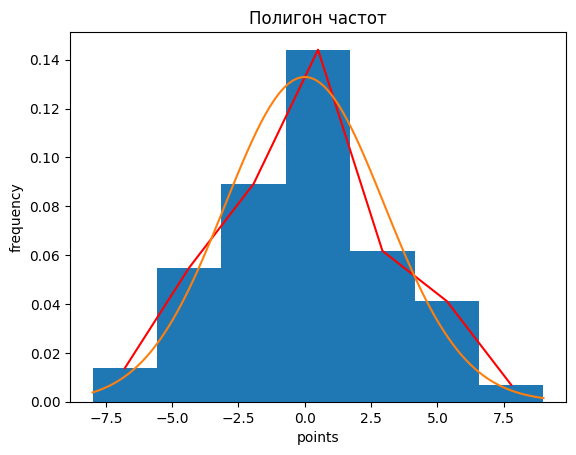

In [227]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")
x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))
plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [228]:
# check
need_to_be_zero = 0 
for i in frequency/n/h:
    need_to_be_zero+=i*h
print(need_to_be_zero)

1.0


Function graph

In [229]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
print(tmp1, tmp1.sum())
print(arrayGraph)


cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)

print((cdfX))
print((cdfY))


[0.03333333 0.13333333 0.21666667 0.35       0.15       0.1
 0.01666667] 1.0
[0, 0.03333333333333333, 0.16666666666666666, 0.3833333333333333, 0.7333333333333333, 0.8833333333333333, 0.9833333333333333]
[-8.0, -5.571428571428571, -3.1428571428571432, -0.7142857142857153, 1.7142857142857135, 4.142857142857142, 6.571428571428569, 9.0]
[0, 0.03333333333333333, 0.16666666666666666, 0.3833333333333333, 0.7333333333333333, 0.8833333333333333, 0.9833333333333333, 1]


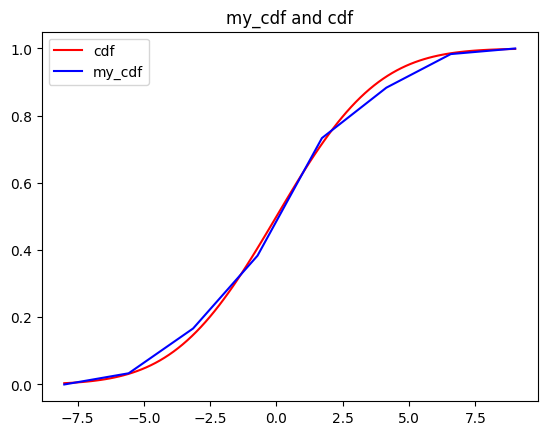

In [230]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-1.620203
0.50,0.068629
0.75,1.804871


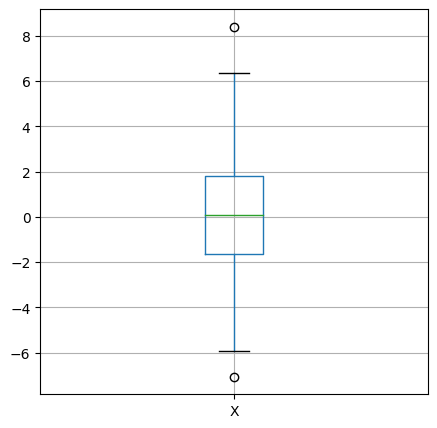

In [231]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [253]:
print(q)
print(f"Вероятность по таблице {0.04599*2}")
print(f"Вероятность по lib {sts.laplace(scale=sigma).pdf(q)}")
prob = 0
for i in sample:
    if i>-q and i<q:
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по таблице 0.09198
Вероятность по lib 0.09300585762834118
Статистическая 0.5


In [ ]:
tem1 = frequency/n
sample

Part II
---
